In [5]:
!pip3 install -r requirements.txt

In [11]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from lightgbm import LGBMClassifier
import warnings

warnings.filterwarnings("ignore")


In [15]:
train = pd.read_csv("D:\\Projects\\Titanic\\train.csv")
test = pd.read_csv("D:\\Projects\\Titanic\\test.csv")

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
train_y = train[["Survived"]]

In [22]:
train["FamilySize"] = train["Parch"] + train["SibSp"] + 1
train["Alone"] = train["FamilySize"].map(lambda s: 1 if s == 1 else 0)
test["FamilySize"] = test["Parch"] + train["SibSp"] + 1
test["Alone"] = test["FamilySize"].map(lambda s: 1 if s == 1 else 0)

In [23]:
train["Sex"] = train["Sex"].map({"male": 1, "female": 0})
test["Sex"] = test["Sex"].map({"male": 1, "female": 0})

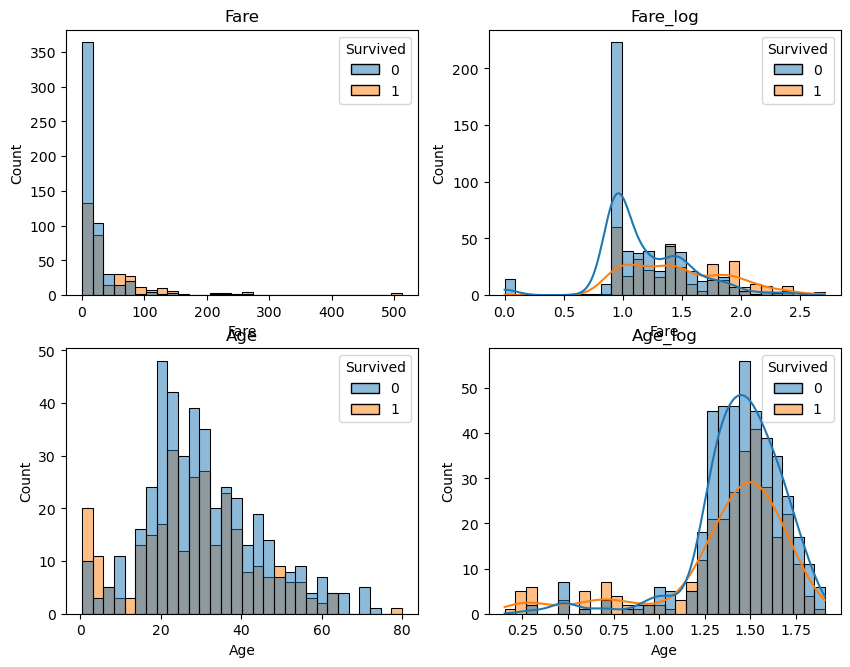

In [32]:
exp_feature = ["Fare" , "Age"]
fig = plt.figure(figsize=(10, 20))
for i, var_name in enumerate(exp_feature):
    ax = fig.add_subplot(5, 2, 2 * i + 1)
    sns.histplot(data=train, x=var_name, axes=ax, bins=30, kde=False, hue="Survived")
    ax.set_title(var_name)

    ax = fig.add_subplot(5, 2, 2 * i + 2)
    sns.histplot(
        data=np.log10(1 + train[[var_name]]).join(train[["Survived"]]),
        x=var_name,
        axes=ax,
        bins=30,
        kde=True,
        hue="Survived"
    )
    ax.set_title(var_name + "_log") 
plt.show()